# Spark Foundation

# Data Science & Business Analytics Tasks

# Task 2: Prediction using Unsupervised ML

[As we know, Machine learning is a method of data analysis that helps in building models. It is a branch of artificial intelligence(AI) based on the idea that systems can learn from data, identify patterns and make decisions with minimal human intervention. It has various types, one being unsupervised learning in which the users do not need to supervise the model. Instead, they allow the model to work on its own to discover patterns and information that was previously undetected. It mainly deals with the unlabelled data.]

[Unsupervised learning has different types, one being K-means clustering that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.]

# By Shreya Basu

In [29]:
#importing the libraries required for doing the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [30]:
#loading the iris dataset from the link provided
iris = datasets.load_iris()
iris_dataframe = pd.DataFrame(iris.data, columns = iris.feature_names)
#printing the first five lines
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
#printing the last five lines
iris_dataframe.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [32]:
#it will give us the shape of the dataset i.e, columns and rows
iris_dataframe.shape

(150, 4)

In [33]:
#used for calculating some statistical data like percentile, mean and std of the numerical values of the Dataframe
iris_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
#it will give us all the information about the dataset
iris_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [35]:
#finding the optimum number of clusters for k-means clustering
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

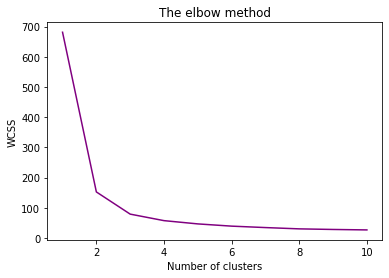

In [36]:
# Plotting the results onto a line graph
plt.plot(range(1, 11), wcss, color="purple")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [37]:
#as we can see from the above graph, it is called 'The elbow method' 
#the optimum clusters is where the elbow occurs
#this is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration

#From this we choose the number of clusters as 3 

#applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

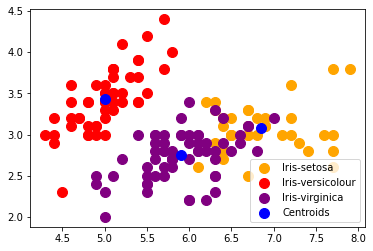

In [38]:
#visualising the clusters:- on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'purple', label = 'Iris-virginica')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'blue', label = 'Centroids')

plt.legend()